<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Unsupervised_Image_Super_Resolution_using_Cycle_in_Cycle_Generative_Adversarial_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Image Super-Resolution using Cycle-in-Cycle Generative Adversarial Networks**

논문 링크: https://arxiv.org/abs/1809.00437

본 논문은 Super**-Resolution 문제를 CycleGAN과 결합하여 해결한 CinCGAN**이라는 논문이다.

실제 상황에서 정통적인 SR algorithm들은 잘 작동하기 힘들다. 왜냐하면 기존과 같은 pair한 datasets를 사용할 수 없으며, downscaling method가 무엇인지 알 수 없다. 뿐만아니라 input image 자체가 noisy하고 blurry하다.

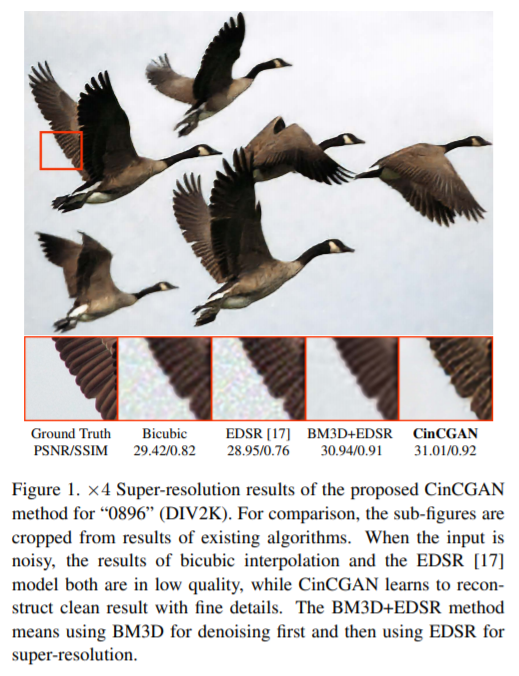

따라서 위의 그림 Figure 1을 보면 알 수 있듯이 기존의 전통적인 SR algorithm들은 지저분한 input이 들어오면 잘 작동하지 못한다. 이를 해결하기 위해 blind SR 등 여러 시도가 있었지만, 결론적으로 만족스러운 성능을 얻진 못했다.

따라서 본 논문에서는 CycleGAN의 전략들을 가지고 새로운 network인 **Cycle-in-Cycle structure(CinCGAN)**을 제안한다.

## **CinCGAN**

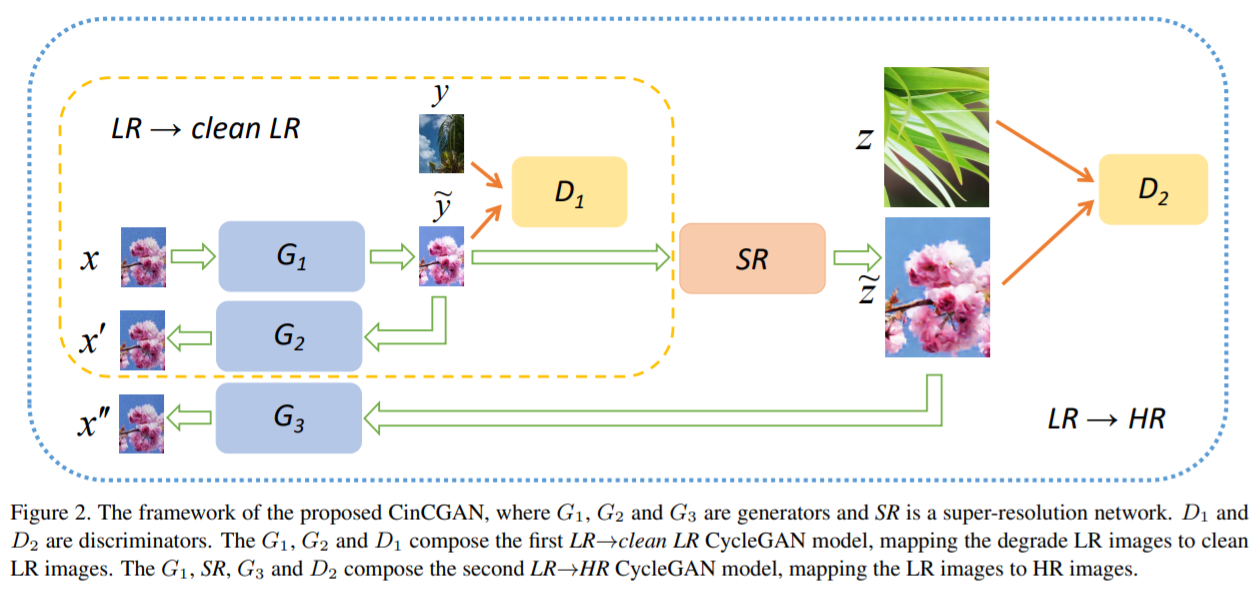

위의 그림 Figure 2는 CinCGAN의 전체적인 structure를 보여준다. 전체적으로 총 2개의 Cycle로 구성이 되어있다. 첫번째 Cycle인 안쪽의 Cycle에서는 LR을 clean하고 bicubic하게 down-sampling을 한다. 두번째 Cycle인 바깥의 Cycle에서는 안쪽의 Cycle로부터 얻은 clean LR을 SR를 통해 고해상도 이미지로 바꿔준다.

먼저 첫번째 Cycle인 LR Image Restoration part을 보면, 2개의 generator와 1개의 discriminator로 이루어져 있다. 첫번째 generator는 clean한 LR을 만드는 역할을 한다. 그리고 discriminator는 generator가 만든 LR이 진짜 clean한 image인지 판단을 한다. 이때 사용이되는 y는 HR로부터 bi-cubic down-sampling된 image가 사용된다.

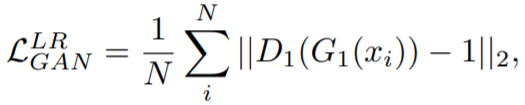

위의 식이 이때 사용되는 loss function이다.

두번째 generator는 Cycle consistency를 위해 사용되며 첫번째 generator으로부터 만들어진 image를 다시 원상태인 지저분한 image로 바꾸는 역할을 한다.

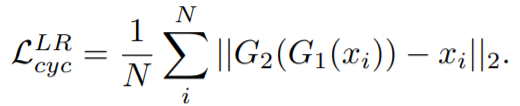

위의 식이 이때 사용되는 Cycle loss이다.

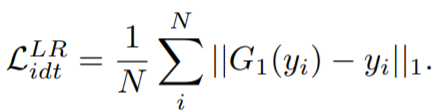

위에서 본 두개의 식 뿐만아니라 color의 variation을 유지하기 위해 위의 식과 같은 identity loss를 사용한다.

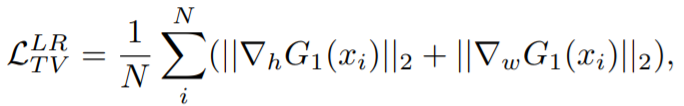

마지막으로 위의 식과 같은 total variation loss를 추가하여 image의 전체적인 spatial smoothness를 잡아줬다.

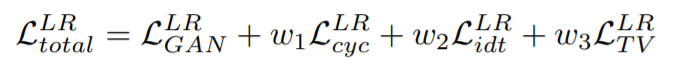

결과적으로 안쪽 Cycle의 최종적인 loss function은 위의 식과 같이 된다.

그리고 바깥의 Cycle인 두번째 Cycle에서의 discriminator는 SR결과와 실제 HR image를 가지고 판단을 하게 된다.

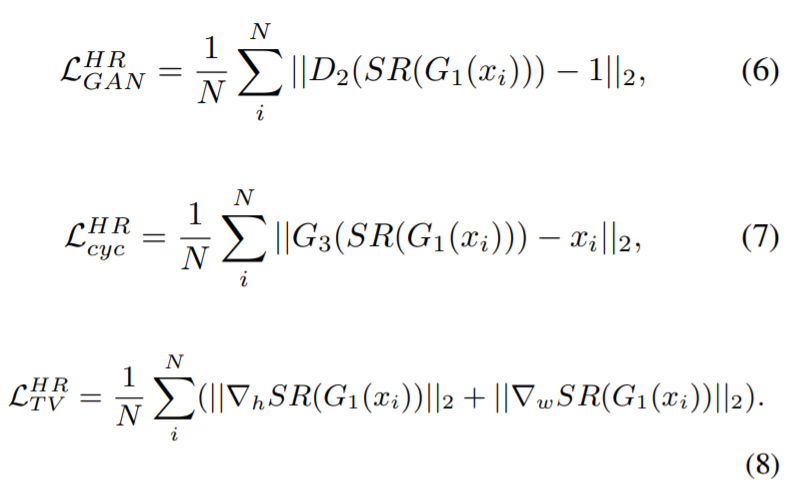

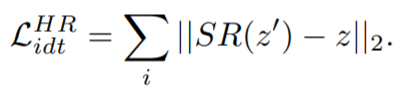

사용되는 전체적인 loss function은 첫번째 Cycle의 loss function과 동일하다.

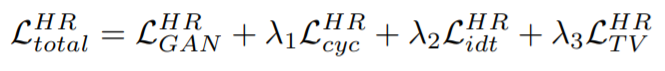

따라서 두번째 Cycle의 전체적인 loss function은 위와 같이 된다.

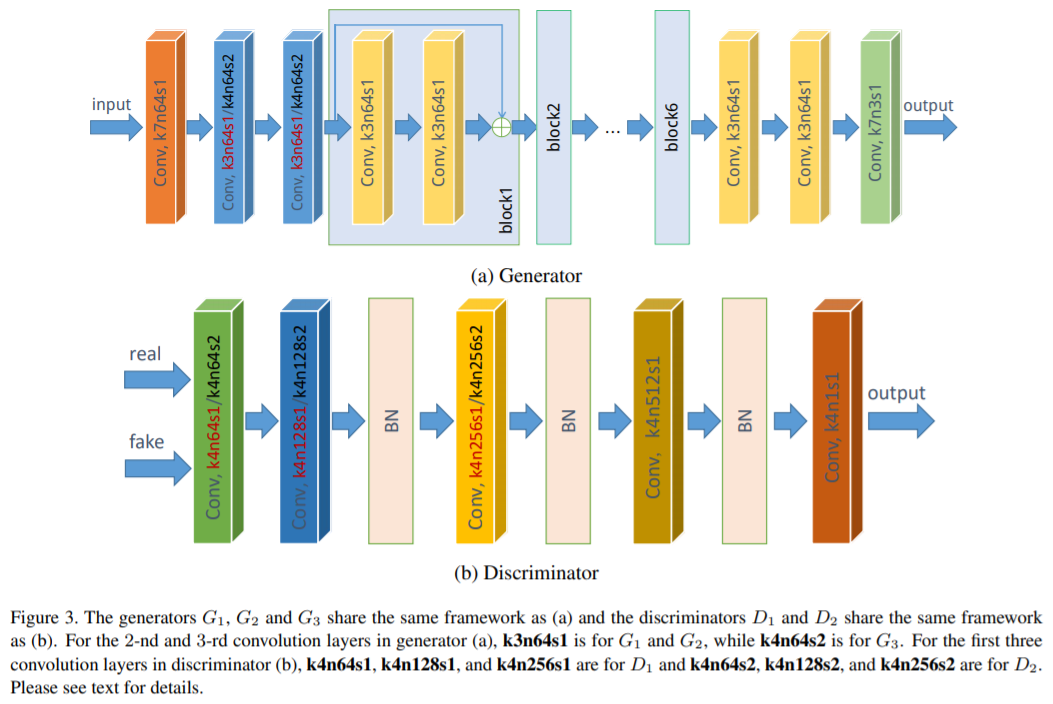

위의 그림 Figure 3은 CinCGAN에서 사용되는 모델의 구조를 자세히 보여준다. discriminator는 PatchGAN을 사용한다.

## **Experiments**

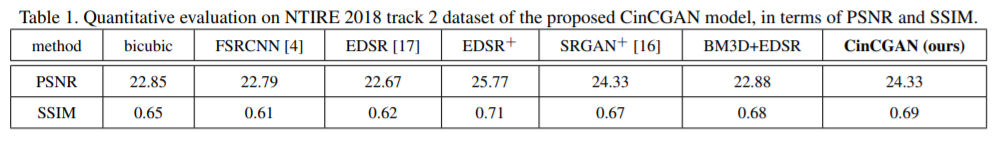

위의 표 Table 1을 보면 다른 SR model들과 PSNR과 SSIM을 비교한 결과이다. GAN 기반 모델이기 때문에 PSNR은 비교적 높은 수치를 보이지는 않는다.

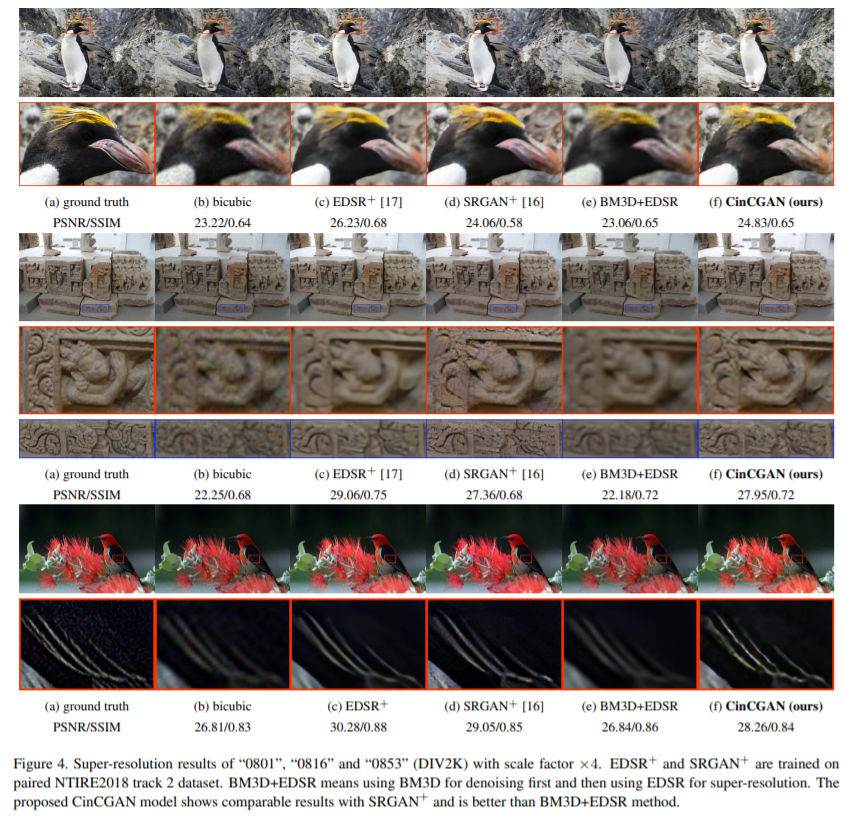

위의 그림 Figure 4는 **NTIRE2018 SuperResolution Challenge1** dataset을 사용하여 CinCGAN을 비롯해 여러 모델과의 결과를 비교한 것이다. 위에서 봤던 표 Table 1에 나온 값에 비해 훨씬 좋은 퀄리티를 보여준다.